In [2]:
import requests
import json
import ipywidgets as widgets
import base64
import os
from dotenv import load_dotenv

load_dotenv()
bria_api_token = os.environ.get("BRIA_API_KEY", "Not Found")

In [42]:
from jupyter_compare_view import compare
from IPython.display import display
from PIL import Image

def resize(image, target_width):
    w, h = image.size
    aspect_ratio = h / w  # Compute aspect ratio
    new_height = int(target_width * aspect_ratio)  # Calculate new height
    return image.resize((target_width, new_height), Image.Resampling.LANCZOS)

def convert_to_rgb(image):
    if image.mode == "RGBA":
        rgb_image = Image.new("RGB", image.size, (255, 255, 255))  # Create a new RGB image with a white background
        rgb_image.paste(image, mask=image.split()[3])  # Apply transparency mask
        return rgb_image
    return image  # If already RGB, return as is

def load_image(url):
    # TODO: load from network
    before = Image.open("bg.jpg").convert("RGBA")  # Ensure correct mode
    after = Image.open("no-bg.png").convert("RGBA")  # Ensure correct mode
    
    before = convert_to_rgb(before)
    after = convert_to_rgb(after)

    target_width = 1000
    before_resized = resize(before, target_width)
    after_resized = resize(after, target_width)

    return (before_resized,after_resized)


before,after = load_image("xx")
# Create the comparison view
compare_widget = compare(before_resized, after_resized, start_mode="horizontal", start_slider_pos=0.5, add_controls=False)


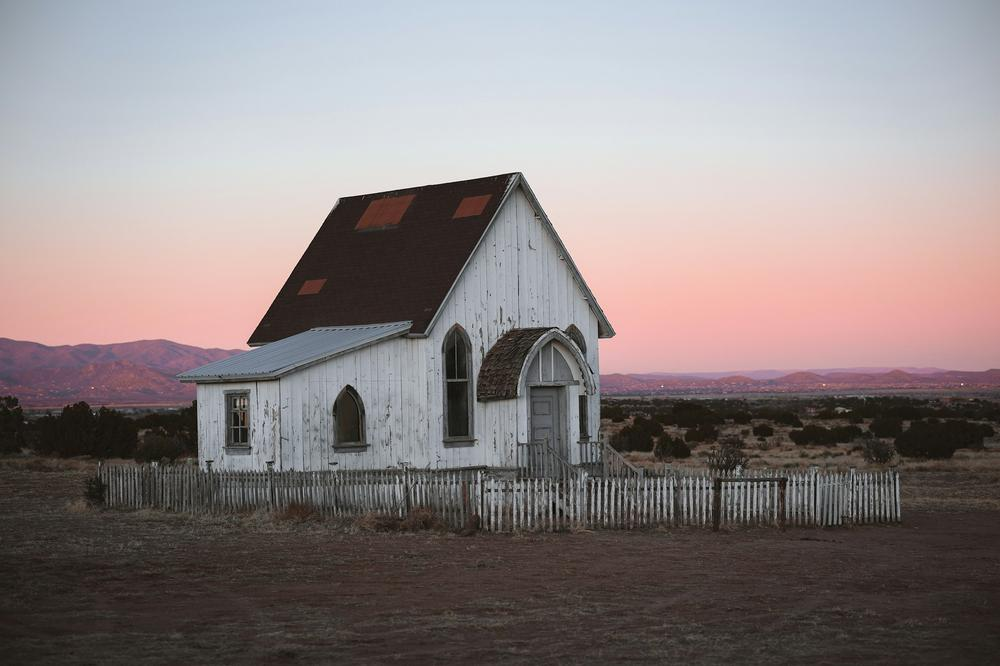
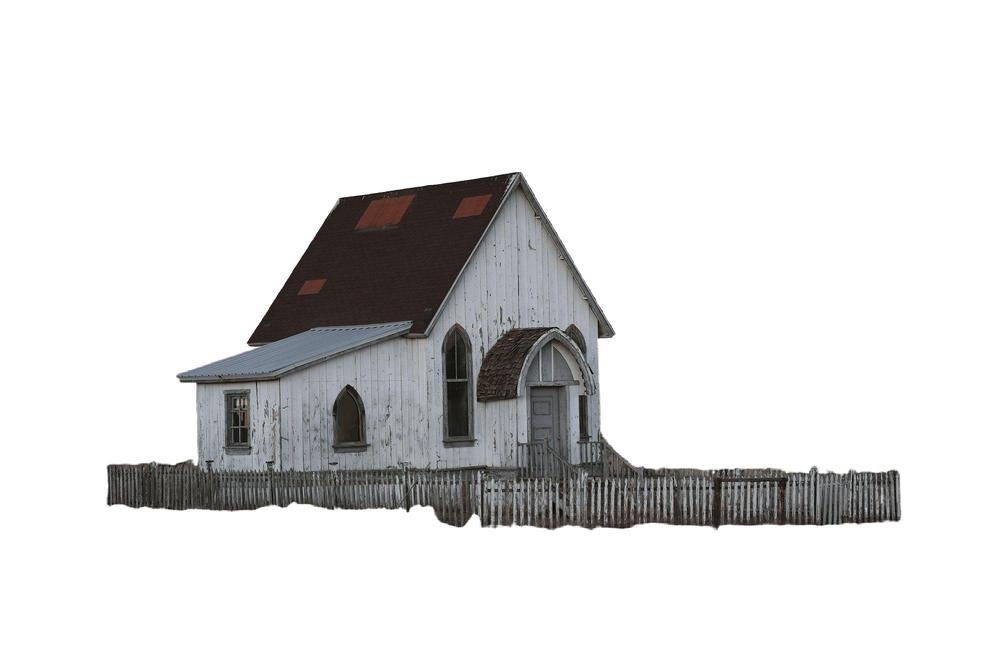

In [43]:
from IPython.core.display import HTML

# Create an HTML wrapper with a border
bordered_widget = f"""
<div style="border: 1px solid black; padding: 10px; display: inline-block;">
    {compare_widget._repr_html_()}
</div>
"""

# Display the bordered widget
display(HTML(bordered_widget))